In [4]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [5]:
data = pd.read_csv('customer_churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
data.shape

(7043, 21)

In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
import numpy as np

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix

In [12]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
data['customerID'].duplicated().sum()

0

In [14]:
# Logistic regression on churn using tenure, SeniorCitizen and MonthlyCharges

# extracting relevant data
data_rel = data[['Churn','tenure', 'SeniorCitizen', 'MonthlyCharges']]

In [15]:
# checking values of numerical in the new dataset
data_rel.describe()

,tenure,SeniorCitizen,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,0.162147,64.761692
std,24.559481,0.368612,30.090047
min,0.000000,0.000000,18.250000
25%,9.000000,0.000000,35.500000
50%,29.000000,0.000000,70.350000
75%,55.000000,0.000000,89.850000
max,72.000000,1.000000,118.750000


In [16]:
# checking categorical values
print(data['Churn'].value_counts())
print(data['SeniorCitizen'].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


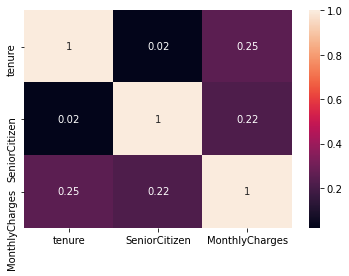

In [17]:
# heatmap of regression data
sns.heatmap(round(data_rel.corr(),2), annot=True, annot_kws={"size": 10})
plt.show()

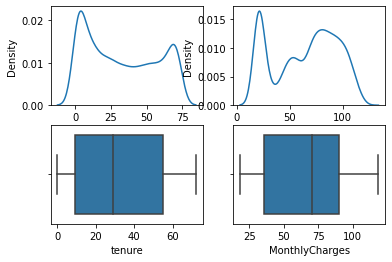

In [18]:
# distributions of numerical features
fig, ax = plt.subplots(2,2)
sns.kdeplot(data['tenure'], ax=ax[0,0])
sns.kdeplot(data['MonthlyCharges'], ax=ax[0,1])
sns.boxplot(x=data['tenure'], ax=ax[1,0])
sns.boxplot(x=data['MonthlyCharges'], ax=ax[1,1])
plt.show()

In [19]:
# setting target and features
y = data_rel['Churn']
X = data_rel[['tenure', 'SeniorCitizen', 'MonthlyCharges']]

In [20]:
# rain test split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 0.40, random_state=100)

In [21]:
# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
#Logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_train_predict = log_reg.predict(X_train)
y_test_predict = log_reg.predict(X_test)

In [23]:
# confusion matrix
plot_confusion_matrix(log_rel, X_train, y_train)
plot_confusion_matrix(log_reg, X_test, y_test)
plt.show()

NameError: name 'log_rel' is not defined

In [24]:
# test accuracy
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))

0.7955029585798816
0.7821149751596878


In [25]:
# precision
print(precision_score(y_train, y_train_predict, pos_label = 'Yes'))
print(precision_score(y_test, y_test_predict, pos_label = 'Yes'))

0.6607369758576874
0.628731343283582


In [27]:
# recall
print(recall_score(y_train, y_train_predict, pos_label = 'Yes'))
print(recall_score(y_test, y_test_predict, pos_label = 'Yes'))

0.4655326768128917
0.44813829787234044


In [42]:
#f1 score
print(f1_score(y_train, y_train_predict, pos_label = 'Yes'))
print(f1_score(y_test, y_test, pos_label = 'Yes'))

0.546218487394958
1.0


In [31]:
# Summary
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

          No       0.83      0.91      0.87      3108
         Yes       0.66      0.47      0.55      1117

    accuracy                           0.80      4225
   macro avg       0.74      0.69      0.71      4225
weighted avg       0.78      0.80      0.78      4225



In [33]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [34]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [37]:
rus = RandomUnderSampler(random_state = 10)
X_rus, y_rus = rus.fit_resample(X,y)
y_rus.value_counts()

Yes    1869
No     1869
Name: Churn, dtype: int64

In [39]:
t1 = TomekLinks()
X_under,y_under = t1.fit_resample(X,y)
y_under.value_counts()

No     4712
Yes    1869
Name: Churn, dtype: int64

In [40]:
ros = RandomOverSampler(random_state = 42)
X_res,y_res = ros.fit_resample(X,y)
y_res.value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

In [41]:
sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(X,y)
y_res.value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64